# Let's get started with coding

## Start with imports

In [1]:
import numpy as np
import random

## get library files

In [2]:
from ME4612021Fproject import *
import tulumba

8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--
	GROUP IDS and STARTING LOCATIONS 
8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--
   tulumba ID = 1, starting from (25, 175)

]4;0;#11131c\]4;1;#566578\]4;2;#8B8178\]4;3;#597293\]4;4;#5E81AC\]4;5;#6D90B0\]4;6;#7BA7C4\]4;7;#bbd1dc\]4;8;#82929a\]4;9;#566578\]4;10;#8B8178\]4;11;#597293\]4;12;#5E81AC\]4;13;#6D90B0\]4;14;#7BA7C4\]4;15;#bbd1dc\]10;#bbd1dc\]11;#11131c\]12;#bbd1dc\]13;#bbd1dc\]17;#bbd1dc\]19;#11131c\]4;232;#11131c\]4;256;#bbd1dc\]708;#11131c\fish: No matches for wildcard “frame*.png”. See `help expand`.
rm frame*.png 2>>dumpy
   ^


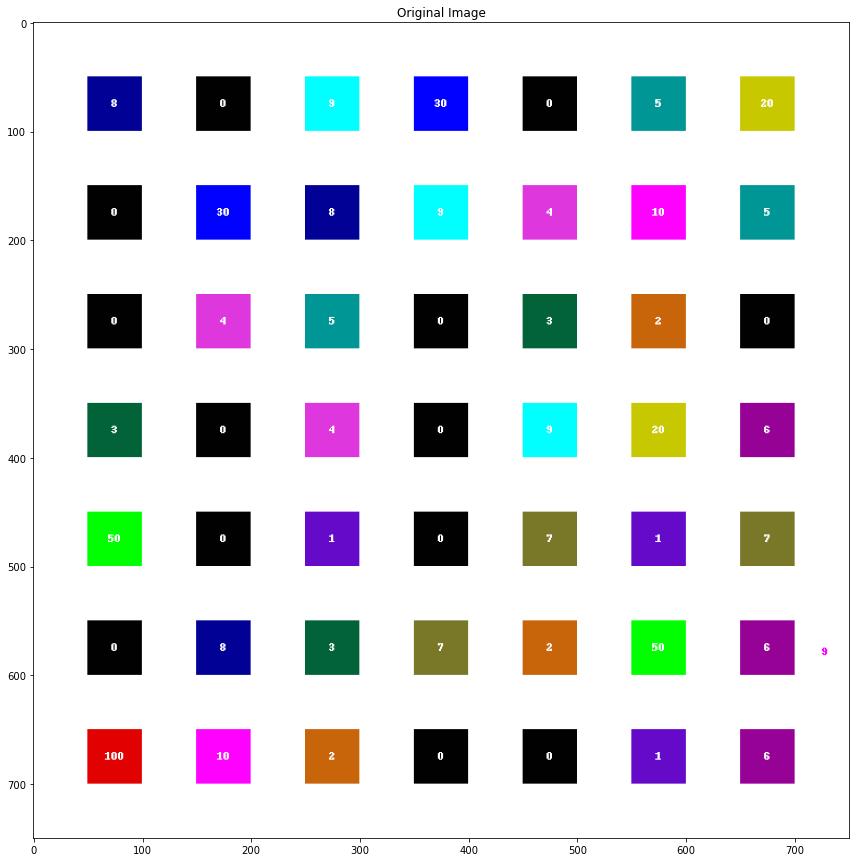

In [3]:
# initial points in the game for each player
Pinit = 301
# groups names
#group_names = ['atlas', 'backspacex', 'ducati', 'hepsi1', 'mechrix', 'meturoam', 'nebula', 'ohmygroup', 'tulumba']
group_names = ['umut1','umut2','umut3','ulas','ulas2','ulas3','ulas4','ulas5','ulas6']

Players = {}
playerID = [x for x in range(len(group_names))] # generate player IDs


# set default player locations, note that playerIDs are randomly ordered
initLocs = [(25, 175),(25, 375),(25, 575),(175, 25),(375, 25),(575, 25),(175, 725),(375, 725),(575, 725)]
# a summary of the players
legend = f'{12*"8<--"}\n\tGROUP IDS and STARTING LOCATIONS \n{12*"8<--"}\n'
'''
player = umut1.tulumba("umut1", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["umut1"] = [player, 1, [], initLocs[playerID[0]], Pinit]
player = umut2.tulumba("umut2", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["umut2"] = [player, 2, [], initLocs[playerID[1]], Pinit]
player = umut3.tulumba("umut3", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["umut3"] = [player, 3, [], initLocs[playerID[2]], Pinit]
player = ulas.tulumba("ulas", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["ulas"] = [player, 4, [], initLocs[playerID[3]], Pinit]
player = ulas.tulumba("ulas2", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["ulas2"] = [player,5, [], initLocs[playerID[4]], Pinit]
player = ulas.tulumba("ulas3", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["ulas3"] = [player, 6, [], initLocs[playerID[5]], Pinit]
player = ulas.tulumba("ulas4", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["ulas4"] = [player, 7, [], initLocs[playerID[6]], Pinit]
player = ulas.tulumba("ulas5", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["ulas5"] = [player, 8, [], initLocs[playerID[7]], Pinit]
'''
num = random.randint(0,len(group_names)-1)
player = tulumba.tulumba("tulumba", colorz, maxStep, maxTime) # set the name, color and max step size for the current player
Players["tulumba"] = [player, num+1, [], initLocs[num], Pinit]
# genereate a new game for these players
aGame = LetsPlayAGame(Players, initLocs, nCorr, colorz, imSize, digits, maxStep) 

for gInd, gName in enumerate(Players.keys()):
    aGame.aMaze.DrawPolyLine(aGame.pmaze, [initLocs[Players[gName][1]-1]], header = digits[Players[gName][1]] )
    legend +=f'{"{0: >10}".format(gName)} ID = {playerID[gInd]+1}, starting from {initLocs[playerID[gInd]]}\n'

# set figures to plot larger than default
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(aGame.pmaze)
plt.title('Original Image')
# finally print the legend
print(legend)
ormaze = aGame.pmaze.copy()
# in case you want a movie, clear frame images first
!rm frame*.png 2>>dumpy
# number of nowin sessions
numNoWin = 0

[(575, 575), (375, 575), (675, 575), (675, 75), (475, 75), (175, 175), (75, 375), (75, 675)]
[[[548, 575]], [[402, 575]], [[648, 575], [648, 103], [652, 103], [652, 98]], [[648, 75]], [[448, 75]], [[148, 175]], [[48, 375]]]
[(575, 575), (375, 575), (675, 575), (675, 75), (475, 75), (175, 175), (75, 375), (75, 675)]


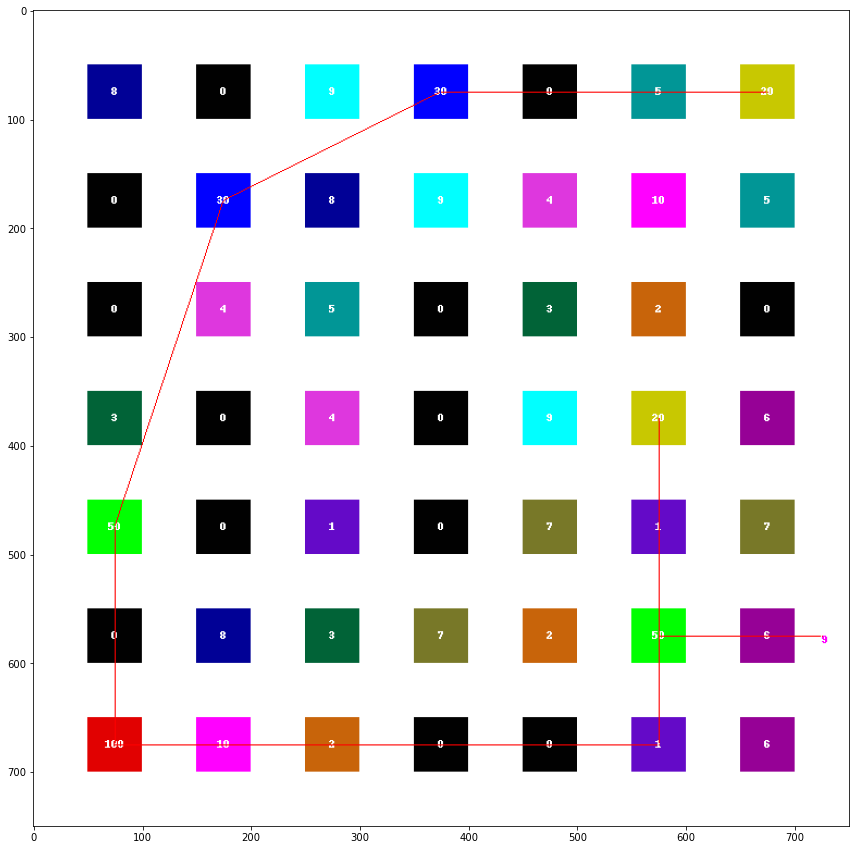

In [4]:

route= tulumba.tulumba.run(Players['tulumba'][0],aGame.maze,aGame.GenerateInfo(Players))
#route=route.reverse()
print(route)
for i in range(len(route)):
    # draw a line from route[i-1] to route[i]
    if i==0:
        #draw a line from my route[i] to initLocs[playerID[gInd]]
        aGame.aMaze.DrawPolyLine(aGame.pmaze, [route[i],initLocs[Players['tulumba'][1]-1]])
    if i !=0:
        aGame.aMaze.DrawPolyLine(aGame.pmaze, [route[i-1], route[i]])
plt.imshow(aGame.pmaze)

In [5]:
def runner(turns):
    global numNoWin
    for i in range(turns):
        numMaxNoPlay = 12
        win, summary = aGame.PlayAStep(debugMode=False)
        if win == []: # oops
            print(summary)
        else:
            # perf contains time performance data
            if len(win.keys()) == 0:
                numNoWin += 1
            else: # reset no win counter
                numNoWin = 0
            # display results
            plt.rcParams["figure.figsize"] = (20,15)
            plt.imshow(aGame.pmaze)
            plt.text(10,10,summary+'\n')
            plt.title(f'Game Step: {aGame.numSteps}\nBoard: {aGame.numBoards}\nPoints: {TotalPoints()} / {aGame.aMaze.RemainingPoints()}\nNo wins:{numNoWin}')
            plt.savefig(f'frame{aGame.numSteps-1}.png')

            if numNoWin >= numMaxNoPlay or  aGame.aMaze.RemainingPoints() == 0: # then we need a new game
                if  aGame.aMaze.RemainingPoints() == 0:
                    print('No bases left, board will be reset')
                else:
                    print('Too many no win games, resetting board next time')
                aGame.ResetBoard()
                numNoWin = 0



[(575, 575), (375, 575), (675, 575), (675, 75), (475, 75), (175, 175), (75, 375), (75, 675)]
[[[548, 575]], [[402, 575]], [[648, 575], [648, 103], [652, 103], [652, 98]], [[648, 75]], [[448, 75]], [[148, 175]], [[48, 375]]]
0.003580086999136256:0.003580086999136256


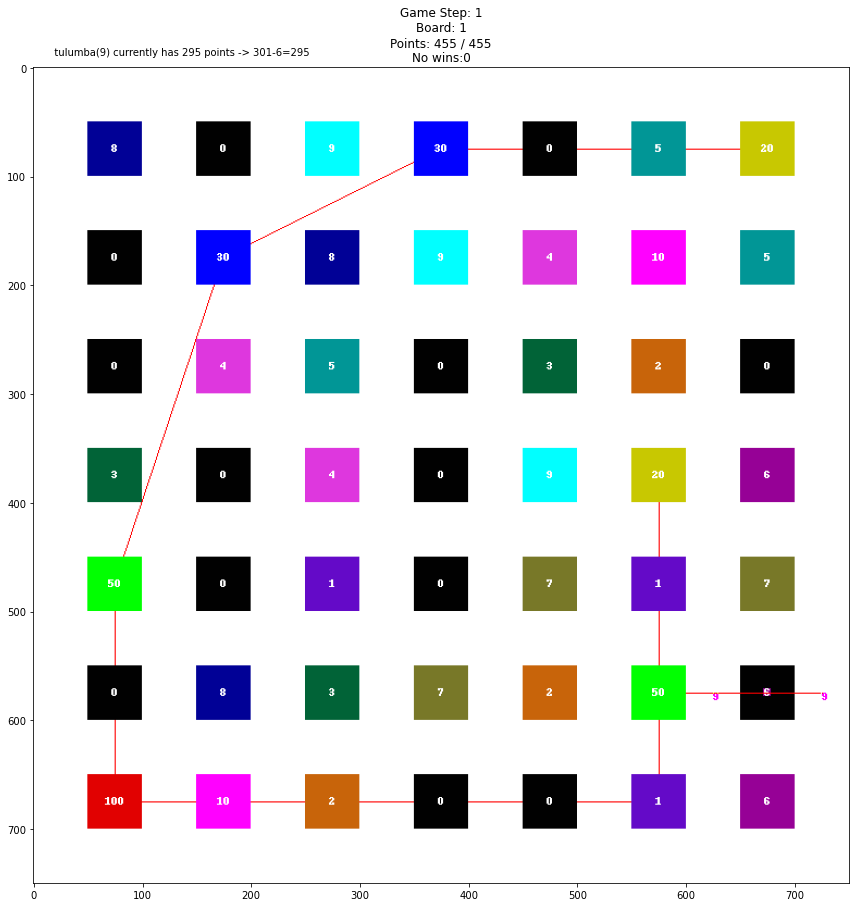

In [6]:
runner(1)